# Data Processing

### Importing the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [2]:
# Import data
dataset = pd.read_csv('Melbourne_housing_extra_data.csv')

In [3]:
# Get number of rows and columns
dataset.shape

(17407, 21)

In [4]:
# View data
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17407 entries, 0 to 17406
Data columns (total 21 columns):
Suburb           17407 non-null object
Address          17407 non-null object
Rooms            17407 non-null int64
Type             17407 non-null object
Price            13525 non-null float64
Method           17407 non-null object
SellerG          17407 non-null object
Date             17407 non-null object
Distance         17407 non-null float64
Postcode         17407 non-null int64
Bedroom2         13625 non-null float64
Bathroom         13625 non-null float64
Car              13625 non-null float64
Landsize         13603 non-null float64
BuildingArea     7323 non-null float64
YearBuilt        8429 non-null float64
CouncilArea      13601 non-null object
Lattitude        13737 non-null float64
Longtitude       13737 non-null float64
Regionname       17407 non-null object
Propertycount    17407 non-null int64
dtypes: float64(10), int64(3), object(8)
memory usage: 2.8+ MB


In [6]:
# View column names
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
# Change column names
dataset.columns = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'PostCode', 'Bedroom2', 'Bathroom', 'Car',
       'LandSize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'RegionName', 'PropertyCount']
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,PostCode,...,Bathroom,Car,LandSize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [8]:
# Remove unnecessary columns and reorder so independent variable is last
dataset = dataset[['Suburb','Rooms', 'Type','Method','Distance', 'PostCode', 'Bedroom2', 'Bathroom', 'Car',
       'LandSize', 'BuildingArea', 'YearBuilt', 'RegionName', 'PropertyCount','Price']]

dataset.head()

,Suburb,Rooms,Type,Method,Distance,PostCode,Bedroom2,Bathroom,Car,LandSize,BuildingArea,YearBuilt,RegionName,PropertyCount,Price
0,Abbotsford,2,h,SS,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Northern Metropolitan,4019,NaN
1,Abbotsford,2,h,S,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019,1480000.0
2,Abbotsford,2,h,S,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019,1035000.0
3,Abbotsford,3,u,VB,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Northern Metropolitan,4019,NaN
4,Abbotsford,3,h,SP,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019,1465000.0


## Missing Values

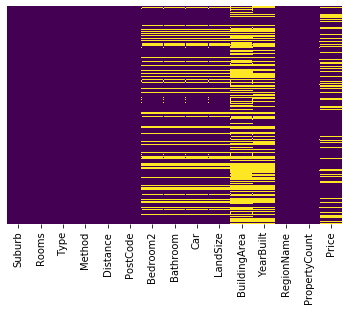

In [9]:
# Visualize missing values
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [10]:
# Count of missing values
dataset.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
Distance             0
PostCode             0
Bedroom2          3782
Bathroom          3782
Car               3782
LandSize          3804
BuildingArea     10084
YearBuilt         8978
RegionName           0
PropertyCount        0
Price             3882
dtype: int64

In [11]:
# Percentage of values missing
dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
Distance          0.000000
PostCode          0.000000
Bedroom2         21.726891
Bathroom         21.726891
Car              21.726891
LandSize         21.853277
BuildingArea     57.930718
YearBuilt        51.576952
RegionName        0.000000
PropertyCount     0.000000
Price            22.301373
dtype: float64

In [12]:
# Remove missing rows
# to remove missing rows from a specific column: dataset = dataset[pd.notnull(dataset['Price'])]
dataset = dataset.dropna() # set axis to 1 to drop entire columns that have a missing value

## Data Types

In [13]:
# View data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5386 entries, 2 to 17405
Data columns (total 15 columns):
Suburb           5386 non-null object
Rooms            5386 non-null int64
Type             5386 non-null object
Method           5386 non-null object
Distance         5386 non-null float64
PostCode         5386 non-null int64
Bedroom2         5386 non-null float64
Bathroom         5386 non-null float64
Car              5386 non-null float64
LandSize         5386 non-null float64
BuildingArea     5386 non-null float64
YearBuilt        5386 non-null float64
RegionName       5386 non-null object
PropertyCount    5386 non-null int64
Price            5386 non-null float64
dtypes: float64(8), int64(3), object(4)
memory usage: 673.2+ KB


Non-null object types should be converted to categories to allow for better anaylysis.

In [14]:
# Identify object columns
dataset.select_dtypes(['object']).columns

Index(['Suburb', 'Type', 'Method', 'RegionName'], dtype='object')

In [15]:
# Convert non-null objects to category
o2c = dataset.select_dtypes(['object']).columns

for o in o2c:
    dataset[o] = dataset[o].astype('category')
    
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5386 entries, 2 to 17405
Data columns (total 15 columns):
Suburb           5386 non-null category
Rooms            5386 non-null int64
Type             5386 non-null category
Method           5386 non-null category
Distance         5386 non-null float64
PostCode         5386 non-null int64
Bedroom2         5386 non-null float64
Bathroom         5386 non-null float64
Car              5386 non-null float64
LandSize         5386 non-null float64
BuildingArea     5386 non-null float64
YearBuilt        5386 non-null float64
RegionName       5386 non-null category
PropertyCount    5386 non-null int64
Price            5386 non-null float64
dtypes: category(4), float64(8), int64(3)
memory usage: 543.9 KB


Now it is time to examine the numeric variables by doing a statistical summary.

In [16]:
# Statistical summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,5386.0,2.913665e+00,0.971923,1.0,2.0,3.0,3.00,8.0
Distance,5386.0,9.131730e+00,4.778950,0.0,5.9,8.7,11.80,47.4
PostCode,5386.0,3.098063e+03,73.233367,3000.0,3043.0,3081.0,3146.00,3977.0
Bedroom2,5386.0,2.879874e+00,0.970242,0.0,2.0,3.0,3.00,9.0
Bathroom,5386.0,1.567583e+00,0.712262,1.0,1.0,1.0,2.00,8.0
Car,5386.0,1.556257e+00,0.936365,0.0,1.0,1.0,2.00,10.0
LandSize,5386.0,4.596144e+02,890.775233,0.0,145.0,351.0,618.75,37000.0
BuildingArea,5386.0,1.412544e+02,92.269960,0.0,90.0,122.0,169.00,3112.0
YearBuilt,5386.0,1.962319e+03,38.850927,1196.0,1935.0,1966.0,1999.00,2018.0
PropertyCount,5386.0,7.409759e+03,4332.894106,389.0,4407.0,6567.0,9264.00,21650.0


From the stats summary above, it appears some numeric columns are  assigned to the wrong data type.    

Rooms, Bedroom2, and Bathroom, Car, and Propertycount should not be treated as floats as they are discrete values and should be identified as integers.   

YearBuilt and Postcode will need to be changed as well (to categorical).

In [17]:
# Convert float to integer
f2i = ['Rooms','Bedroom2','Bathroom','Car']
for f in f2i:
       dataset[f] = dataset[f].astype('int')
dataset.describe().transpose()
       
# Convert appropriate columns to categorical
f2c = ['PostCode']
for ff in f2c:
    dataset[ff] = dataset[ff].astype('category')

# Confirm changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5386 entries, 2 to 17405
Data columns (total 15 columns):
Suburb           5386 non-null category
Rooms            5386 non-null int64
Type             5386 non-null category
Method           5386 non-null category
Distance         5386 non-null float64
PostCode         5386 non-null category
Bedroom2         5386 non-null int64
Bathroom         5386 non-null int64
Car              5386 non-null int64
LandSize         5386 non-null float64
BuildingArea     5386 non-null float64
YearBuilt        5386 non-null float64
RegionName       5386 non-null category
PropertyCount    5386 non-null int64
Price            5386 non-null float64
dtypes: category(5), float64(5), int64(5)
memory usage: 518.7 KB


# Exploratory Analysis

In [18]:
# Feature engineering

# Convert price to millions
dataset['Price'] = dataset['Price']/1000000

# Home Age
dataset['HomeAge'] = 2017 - dataset['YearBuilt']

# Identify homes older than 50 years old as historic
dataset['Historic'] = np.where(dataset['HomeAge']>=50,1,0)

# Confirm changes
dataset.head()   

,Suburb,Rooms,Type,Method,Distance,PostCode,Bedroom2,Bathroom,Car,LandSize,BuildingArea,YearBuilt,RegionName,PropertyCount,Price,HomeAge,Historic
2,Abbotsford,2,h,S,2.5,3067,2,1,0,156.0,79.0,1900.0,Northern Metropolitan,4019,1.035,117.0,1
4,Abbotsford,3,h,SP,2.5,3067,3,2,0,134.0,150.0,1900.0,Northern Metropolitan,4019,1.465,117.0,1
6,Abbotsford,4,h,VB,2.5,3067,3,1,2,120.0,142.0,2014.0,Northern Metropolitan,4019,1.600,3.0,0
11,Abbotsford,3,h,S,2.5,3067,4,2,0,245.0,210.0,1910.0,Northern Metropolitan,4019,1.876,107.0,1
14,Abbotsford,2,h,S,2.5,3067,2,1,2,256.0,107.0,1890.0,Northern Metropolitan,4019,1.636,127.0,1


## Univariate Analysis 

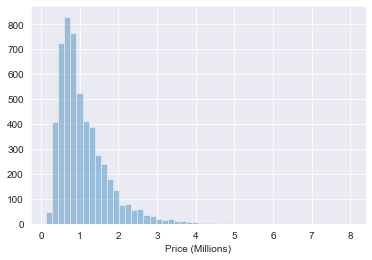

In [19]:
sns.set_style('darkgrid')

# Create histogram
sns.distplot(dataset['Price'],kde = False)
plt.xlabel('Price (Millions)')
plt.show()

## Bivariate Analysis

### Categorical Features
Next, I want to compare the relationship between the categorical features and the Price.  

In [20]:
# Identify categorical variables
categorical = dataset.select_dtypes(['category']).columns
print(categorical)
len(categorical)

Index(['Suburb', 'Type', 'Method', 'PostCode', 'RegionName'], dtype='object')


5

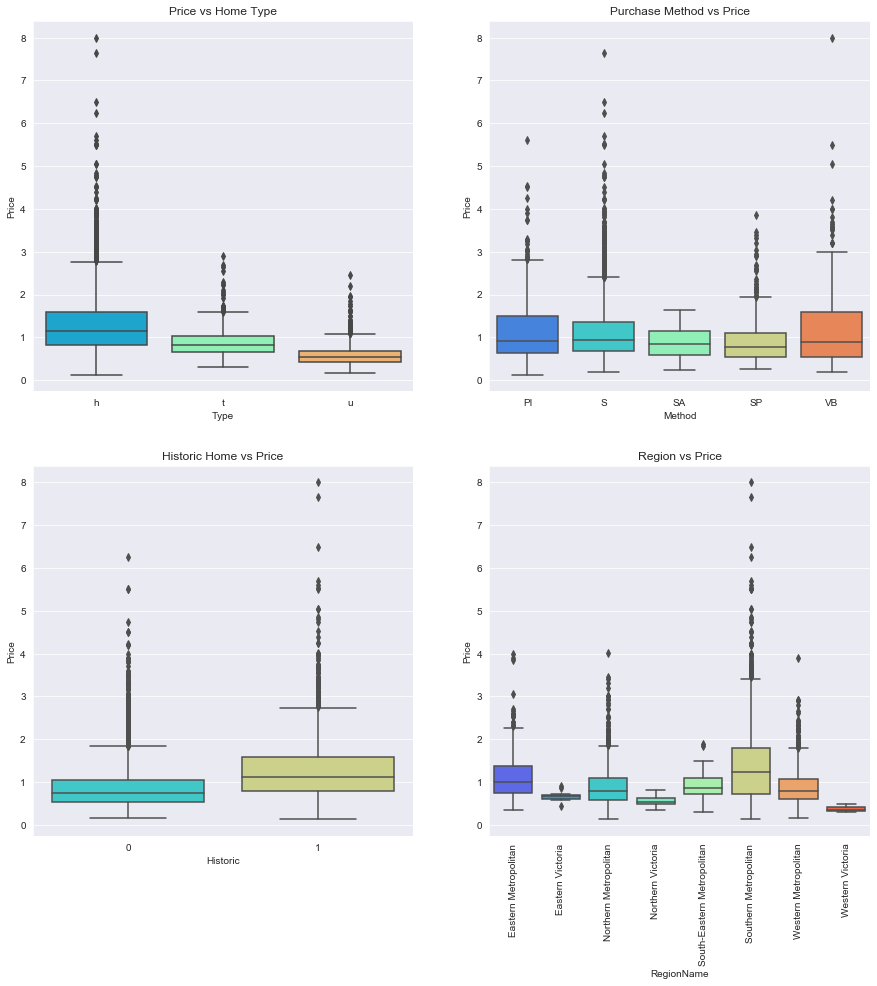

In [21]:
# Create subplot
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
p1 =sns.boxplot(dataset.Type, dataset.Price, ax = axes[0,0], palette = 'rainbow')
p1.title.set_text('Price vs Home Type')

# Plot [0,1]
p2 = sns.boxplot(dataset.Method, dataset.Price, ax = axes[0,1],palette = 'rainbow')
p2.title.set_text('Purchase Method vs Price')

# Plot [1,0]
p3 = sns.boxplot(dataset.Historic, dataset.Price, ax=axes[1,0],palette = 'rainbow')
p3.title.set_text('Historic Home vs Price')

# Plot [1,1]
p4 = sns.boxplot(dataset.RegionName, dataset.Price, ax = axes[1,1],palette = 'rainbow')
p4.title.set_text('Region vs Price')
plt.xticks(rotation = 90)
plt.show()

In [22]:
# Removing the outlier
#tdataset = dataset[dataset['Price']<8]
#tdataset.describe().transpose()

### Numeric Features
Next I want to analyze the numeric features as they relate to the indpedent variable, Price.

In [23]:
# Stat summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,5386.0,2.913665,0.971923,1.000,2.00000,3.0,3.000000,8.0
Distance,5386.0,9.131730,4.778950,0.000,5.90000,8.7,11.800000,47.4
Bedroom2,5386.0,2.879874,0.970242,0.000,2.00000,3.0,3.000000,9.0
Bathroom,5386.0,1.567583,0.712262,1.000,1.00000,1.0,2.000000,8.0
Car,5386.0,1.556257,0.936365,0.000,1.00000,1.0,2.000000,10.0
LandSize,5386.0,459.614371,890.775233,0.000,145.00000,351.0,618.750000,37000.0
BuildingArea,5386.0,141.254433,92.269960,0.000,90.00000,122.0,169.000000,3112.0
YearBuilt,5386.0,1962.318789,38.850927,1196.000,1935.00000,1966.0,1999.000000,2018.0
PropertyCount,5386.0,7409.758819,4332.894106,389.000,4407.00000,6567.0,9264.000000,21650.0
Price,5386.0,1.092251,0.683168,0.131,0.63525,0.9,1.350875,8.0


In [24]:
# Identify continuous variables
print(dataset.select_dtypes(['float']).columns)

Index(['Distance', 'LandSize', 'BuildingArea', 'YearBuilt', 'Price',
       'HomeAge'],
      dtype='object')


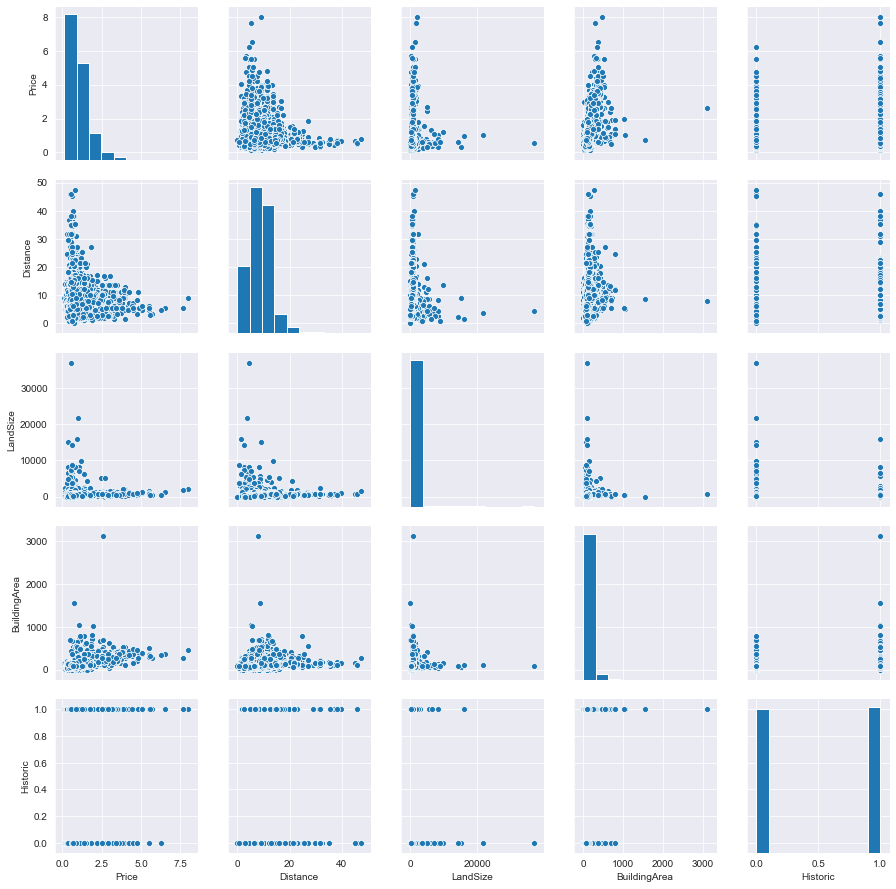

In [25]:
# Plot
sns.pairplot(dataset,
             vars= ['Price','Distance', 'LandSize', 'BuildingArea','Historic'], palette = 'viridis')

**Insights:**  
Prices for historic homes have more variation than that of non-historic homes (less than 50 years old).  
Homes that are a farther distance from the Central Business District (CDB) tend to be priced lower.


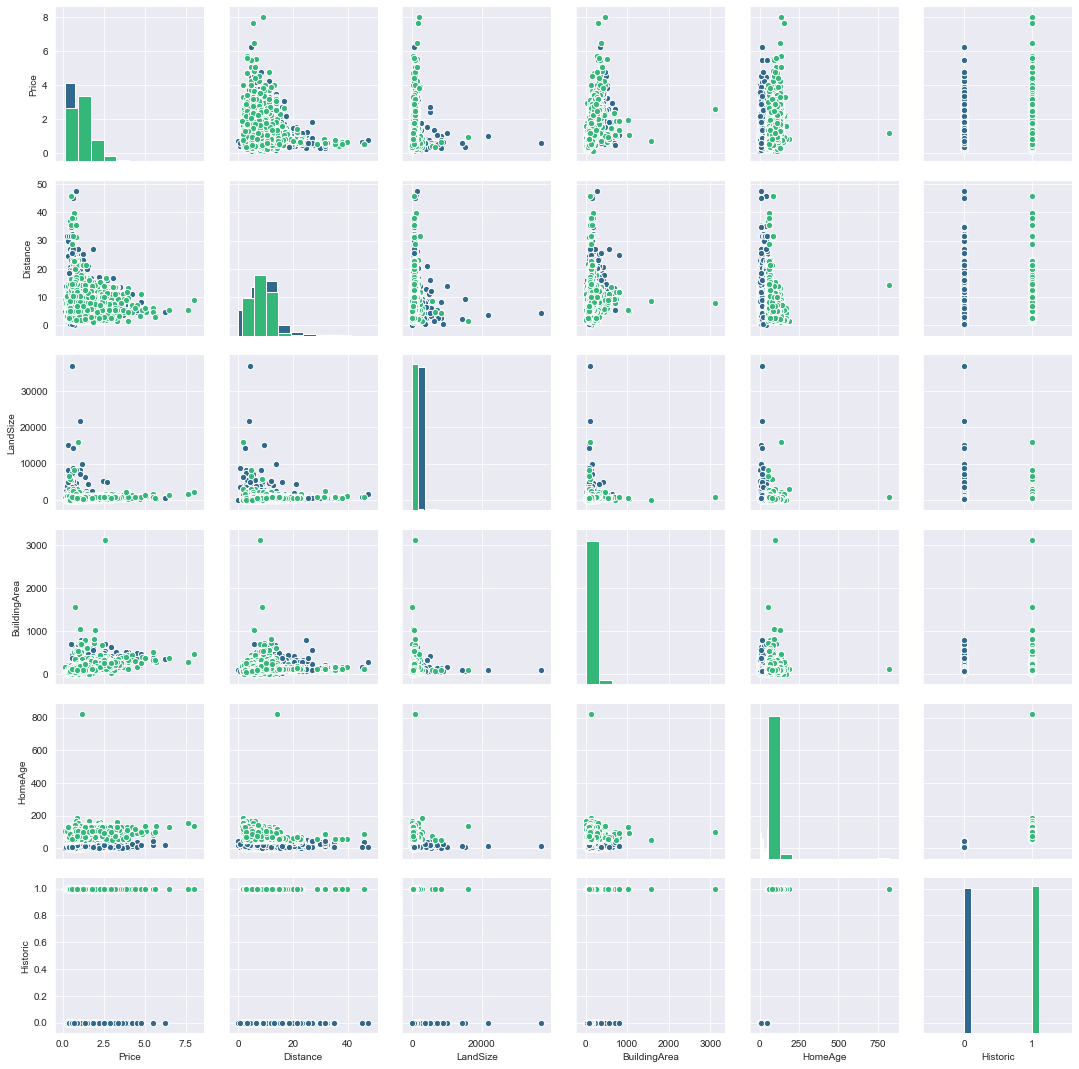

In [26]:
# Plot
g =sns.PairGrid(dataset,
             vars= ['Price','Distance', 'LandSize', 'BuildingArea','HomeAge','Historic'], 
             hue = 'Historic',
             palette = 'viridis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, edgecolor = 'w', s = 40)